In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [5]:
date = "MAY31"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("D0GenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 421, 423, 25)[0]")\
    .Define("D0GenPhi", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[0]")\
    .Define("D0GenEta", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[1]")\
    .Define("size", "goodMeson_pt.size()")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


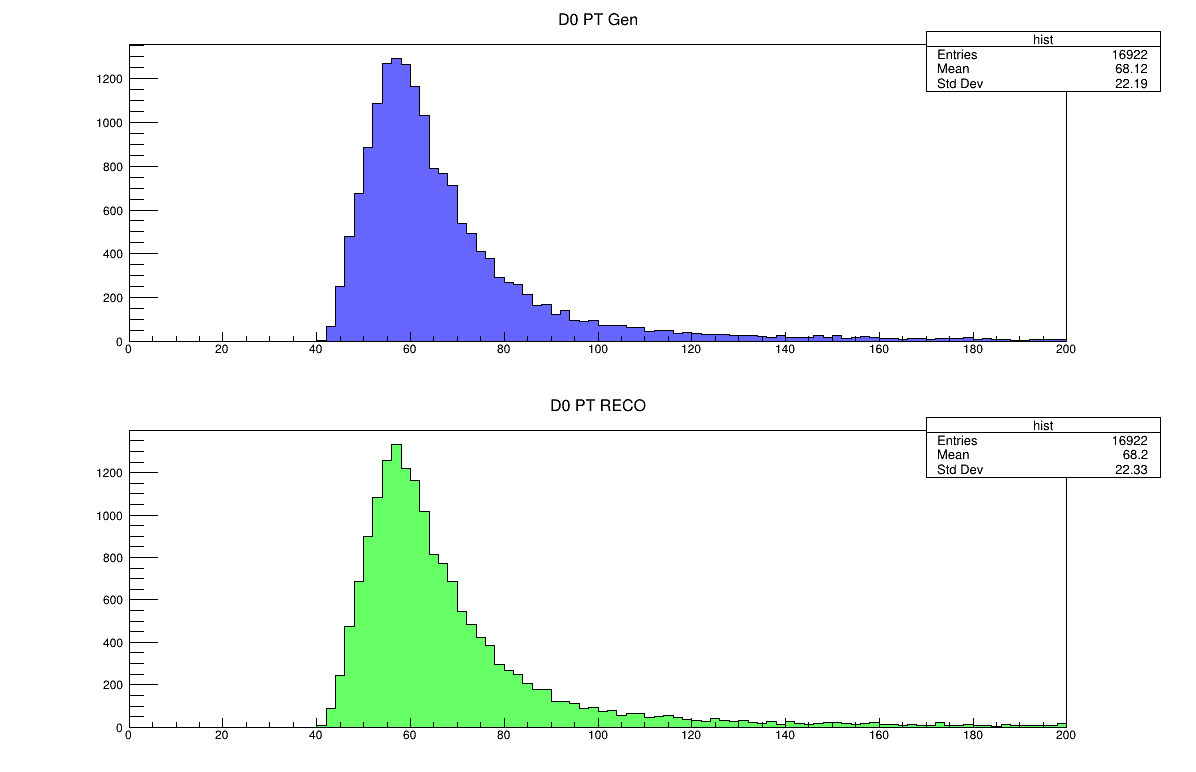

In [6]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

canvas.Divide(1, 2)

bins, xlow, xhigh = 100, 0, 200

hgen=df.Filter("size == 1").Histo1D(("hist", "D0 PT Gen", bins, xlow, xhigh),"D0GenPT")

hreco=df.Filter("size == 1").Histo1D(("hist", "D0 PT RECO", bins, xlow, xhigh),"goodMeson_pt")



hgen.SetFillColor(ROOT.kBlue-7)
hgen.SetLineColor(ROOT.kBlack)
hreco.SetFillColor(ROOT.kGreen-7)
hreco.SetLineColor(ROOT.kBlack)

canvas.cd(1)
hgen.Draw("hist")
canvas.cd(2)
hreco.Draw("hist")

'''
stack = ROOT.THStack("stack", "H cand mass for phi, reconstruction")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
#stack.GetXaxis().SetTitle("p_{T}_{2trk}^{#phi#rightarrow #pi#pi} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.15, 0.65, 0.3, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Rejected (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Accepted (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()
'''


canvas.Draw()


In [26]:
dfnew = df.Filter("size  == 1")

cols = ["D0GenPT", "D0GenPhi", "D0GenEta", "goodMeson_pt", "goodMeson_phi", "goodMeson_eta"]

x = dfnew.AsNumpy(columns=cols)

#print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

display(pddf)
#print(set(pddf["mc"]))

,D0GenPT,D0GenPhi,D0GenEta,goodMeson_pt,goodMeson_phi,goodMeson_eta
0,61.625,-0.145508,-1.500000,[61.5971565246582],[-0.1455514281988144],[-1.498134732246399]
1,215.000,-3.000000,-0.278320,[213.74256896972656],[-2.9967997074127197],[-0.2780139446258545]
2,61.875,1.957031,-1.593750,[61.060001373291016],[1.9556885957717896],[-1.5929715633392334]
3,62.875,-3.093750,0.539062,[62.710792541503906],[-3.0916614532470703],[0.5397191047668457]
4,55.750,-0.399414,-0.337891,[55.389991760253906],[-0.3995724022388458],[-0.33725103735923767]
...,...,...,...,...,...,...
16917,54.000,-2.804688,-0.527344,[54.524139404296875],[-2.8026223182678223],[-0.5278573036193848]
16918,156.000,0.465820,-0.196289,[161.21376037597656],[0.4659263789653778],[-0.1967160403728485]
16919,65.000,-1.257812,0.529297,[65.28115844726562],[-1.256664514541626],[0.5292765498161316]
16920,127.000,1.015625,-0.287109,[126.67811584472656],[1.015766978263855],[-0.28693997859954834]


In [27]:
ptgen = np.array([x for x in pddf["D0GenPT"].tolist()])
ptreco = np.array([x[0] for x in pddf["goodMeson_pt"].tolist()])
print(ptgen, len(ptgen))
print(ptreco, len(ptreco))

[ 61.625 215.     61.875 ...  65.    127.     61.25 ] 16922
[ 61.59715652 213.74256897  61.06000137 ...  65.28115845 126.67811584
  61.01682281] 16922


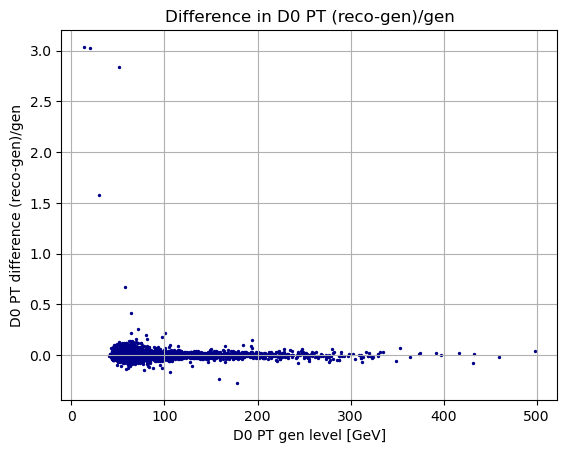

0.04122028298981575 2.0727763221032767


In [28]:
plt.scatter(ptgen, (ptreco-ptgen)/ptgen, s=2, color = "#000088")
plt.title("Difference in D0 PT (reco-gen)/gen")
plt.xlabel("D0 PT gen level [GeV]")
plt.ylabel("D0 PT difference (reco-gen)/gen")
plt.grid()
plt.show()
print(np.mean(ptreco-ptgen), np.std(ptreco-ptgen))